In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
import pickle

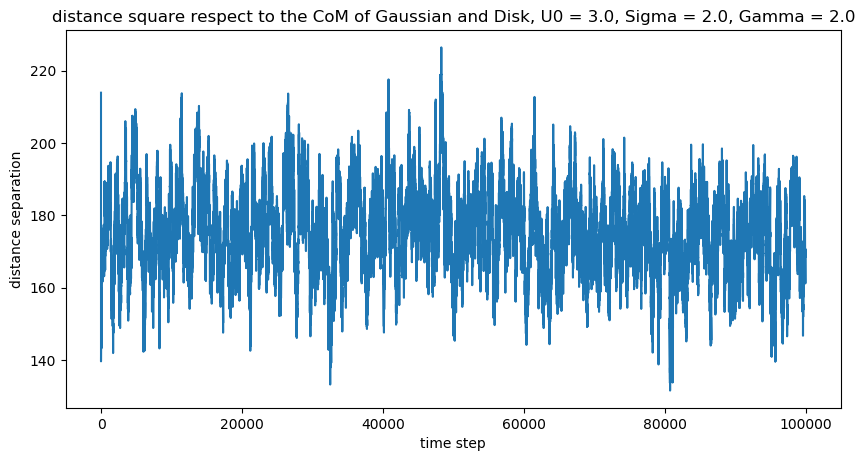

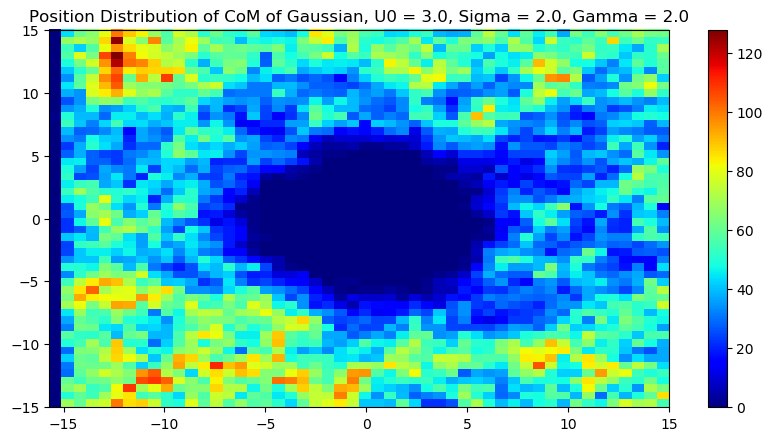

In [10]:
def Brownian(**args):
    Nsteps, dt = args['Nsteps'], args['dt']
    U0, Sigma  = args['U0'], args['Sigma']
    ksi        = np.array(args['ksi'])
    box        = args['box']
    gamma      = args['gamma']
    R          = args['R']
    vels = np.array([0.0, 0.0])
    posB = [10*np.random.randn() for i in range(2)]
    step = 0
    dist = []
    x = []
    y = []
    
    while step < Nsteps:
        step += 1
        r1 = r(posB, ksi)
        X1 = X(posB, ksi)
        posB = trans_soft(dt, X1, r1, posB, U0, Sigma,gamma,R)
        PBC(posB,box,ksi)
        dist.append(r1**2)
        x.append(X1[0])
        y.append(X1[1])
    return dist, x, y


def r(posB,ksi):                                     
    r1 = np.sqrt((posB[0]-ksi[0])**2 + (posB[1]-ksi[1])**2)
    return r1

def X(posB,ksi):                                #the vector point from center of Gaussian to current position
    X1 = [posB[0]-ksi[0],posB[1]-ksi[1]]
    return np.array(X1)

def trans_particle(dt,X,r,posB,U0,Sigma,gamma):
    X = np.array(X)
    vels = ((U0*np.exp((-r**2)/(2*Sigma**2)))/(Sigma**2))*X + np.random.randn(2)/np.sqrt(dt)
    posB += vels*dt/gamma
    return posB

def trans_soft(dt,X,r,posB,U0,Sigma,gamma,R):
    X = np.array(X)
    vels = U0*np.pi*2*((Sigma**2)*(R**2)/(R**2+Sigma**2)**2)*np.exp(-r**2/(2*(Sigma**2+R**2)))*X + np.random.randn(2)/np.sqrt(dt)
    posB += vels*dt/gamma
    return posB

def PBC(posB,box,ksi):
    ndim = len(box)
    for i in range(ndim):
        if posB[i] > ksi[i]+box[i][1]:
            posB[i] = posB[i] -box[i][1] + box[i][0]
        elif posB[i] < box [i][0] + ksi[i]:
            posB[i] = box[i][1] + posB[i] - box[i][0]

if __name__ == '__main__':
    params = {'Nsteps': 100000,                          #total simulation steps
             'dt': 0.5,                               #time step
              'U0': 3.0,                              
              'Sigma':2.0,                            
              'ksi':[0.0, 0.0],
              'box':((-15,15),(-15,15)),
              'gamma': 2.0,
              'R': 1.0
              }
    PickP = []
    PickX = []
    PickY = []
    for i in range(50):
        dist, x, y = Brownian(**params)
        PickP.append(dist)
        PickX += x
        PickY += y
    AverageP = np.mean(PickP, axis = 0)
    np.savetxt('Disk_trj.txt',AverageP)
    plt.figure(figsize = (10,5), dpi = 100)
    plt.title('distance square respect to the CoM of Gaussian and Disk, U0 = 3.0, Sigma = 2.0, Gamma = 2.0')
    plt.xlabel('time step')
    plt.ylabel('distance separation')
    plt.plot(AverageP)
    plt.show()
    
    plt.figure(figsize = (10,5), dpi = 100)
    plt.hist2d(x,y,bins =50,cmap=plt.cm.jet)
    plt.title("Position Distribution of CoM of Gaussian, U0 = 3.0, Sigma = 2.0, Gamma = 2.0")
    plt.colorbar()
    plt.show()
    
    